In [117]:
# data from: http://archive.ics.uci.edu/ml/machine-learning-databases/wine/
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
'''
1) Alcohol
2) Malic acid
3) Ash
4) Alcalinity of ash  
5) Magnesium
6) Total phenols
7) Flavanoids
8) Nonflavanoid phenols
9) Proanthocyanins
10) Color intensity
11) Hue
12) OD280/OD315 of diluted wines
13) Proline
'''

#### Data Cleasing and Preparation

In [2]:
# Creating header
colnames = ['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoid',\
            'Nonflavanoid phenols','Proanthocyanis','Color Intensity', 'Hue','OD280/OD315','Proline']

In [3]:
# Reading csv and concatenating the header
wineData = pd.read_csv('wine.data.csv', names=colnames, index_col=False)

In [4]:
# Normalizing 
# df_norm = (df - df.mean()) / (df.max() - df.min())
wineData_norm_d = wineData.Alcohol
wineData_norm = (wineData.iloc[:,1:] - wineData.iloc[:,1:].mean()) / (wineData.iloc[:,1:].max() - wineData.iloc[:,1:].min())
wineData_norm['Alcohol'] = wineData_norm_d

In [61]:
# Additional Imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
from sklearn import tree

In [96]:
# Spliting the Data 
trainData, testData = train_test_split(wineData_norm, test_size = 0.2)
trainData, validationData = train_test_split(trainData, test_size = 0.1)

### Train ###

yTrain = trainData.Alcohol
X_Train = trainData.iloc[:,:-1]
    

### Test ###

yTest = testData.Alcohol
X_Test = testData.iloc[:,:-1]


### Validation ###
yValidation = validationData.Alcohol
X_Validation= validationData.iloc[:,:-1]

#### Modeling - Classification Trees

In [82]:
crossvalidation = KFold(n=X_Train.shape[0], n_folds=4, shuffle=True, random_state=1)

for depth in range(1,10):
    
    # Instatiating the object
    t_cls = tree.DecisionTreeClassifier(max_depth=depth, random_state=0)
    fit = t_cls.fit(X_Train, yTrain)

    if fit.tree_.max_depth < depth:
        break

    score = np.mean(cross_val_score(t_cls, X_Train, yTrain ,scoring='accuracy', cv=crossvalidation, n_jobs=1))

    print ('Depth: %i Accuracy: %.3f' %(depth,score))

Depth: 1 Accuracy: 0.622
Depth: 2 Accuracy: 0.866
Depth: 3 Accuracy: 0.914
Depth: 4 Accuracy: 0.929


#### using Bagging

In [130]:
# TODO

#### Modeling - Random Forest

In [129]:
res = RandomForestClassifier(n_jobs=2)
res.fit(X_Train, yTrain)

# Prediction
predict = np.array(res.predict(X_Test))

# Evaluating
eff = 0
for x in range(len(predict)):
    if predict[x] == yTest.tolist()[x]:
        eff += 1
eff/len(predict)    

0.9722222222222222

In [126]:
min_estimators = 15
max_estimators = 175
error_rate = []
estimator = []

for i in range(min_estimators, max_estimators + 1):
    res.set_params(n_estimators=i)
    res.fit(X_Train, yTrain)
    
    # Record the OOB error for each `n_estimators=i` setting.
    error_rate.append(res.oob_score)
    estimator.append(i)

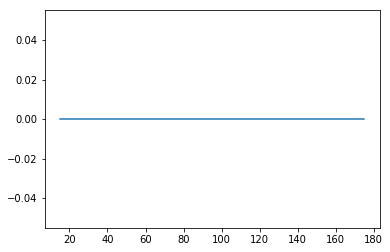

In [131]:
plt.plot(estimator, error_rate)

### Using XGBoost

In [1]:
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'